### Import Libraries

In [62]:
import pandas as pd
import random
import gc
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Import the Dataset

In [2]:
data_df=pd.read_json('train.json')

In [3]:
data_df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


### Data Exploratary 

In [ ]:
data_with_ingr_df.describe()

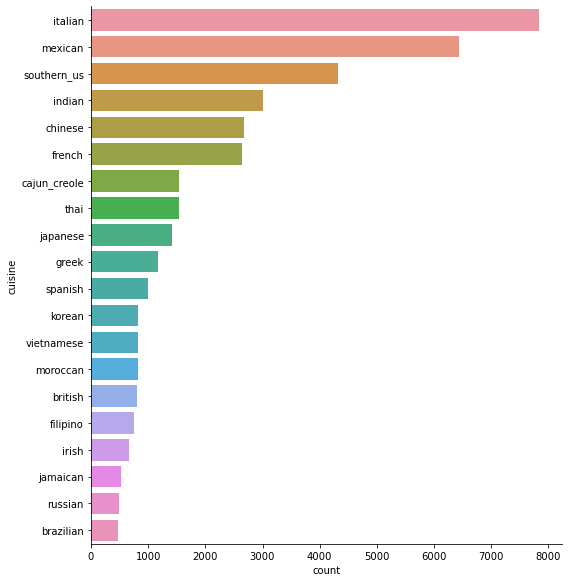

In [4]:
sb.catplot(y = "cuisine", data = data_df, kind = "count", height = 8, order = data_df['cuisine'].value_counts().index)

In [84]:
data_with_ingr_df = data_df.copy()
data_with_ingr_df['ingredient_count'] = 0

for index in range(39774):
    data_with_ingr_df['ingredient_count'][index] = len(data_with_ingr_df.ingredients[index])

<ipython-input-84-3a27d5d37a5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ingr_df['ingredient_count'][index] = len(data_with_ingr_df.ingredients[index])


In [85]:
data_with_ingr_df.head()

,id,cuisine,ingredients,ingredient_count
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [86]:
data_with_ingr_df.describe()

,id,ingredient_count
count,39774.000000,39774.000000
mean,24849.536959,10.767713
std,14360.035505,4.428978
min,0.000000,1.000000
25%,12398.250000,8.000000
50%,24887.000000,10.000000
75%,37328.500000,13.000000
max,49717.000000,65.000000


<AxesSubplot:xlabel='ingredient_count'>

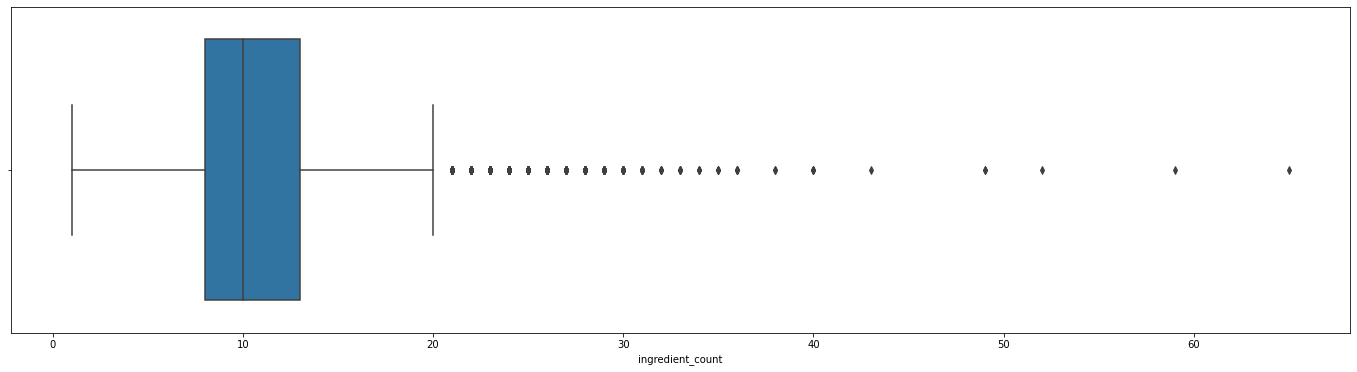

In [87]:
f, ax = plt.subplots(figsize=(24,6))
sb.boxplot(x = 'ingredient_count', data = data_with_ingr_df)

<AxesSubplot:xlabel='ingredient_count', ylabel='number_of_dishes'>

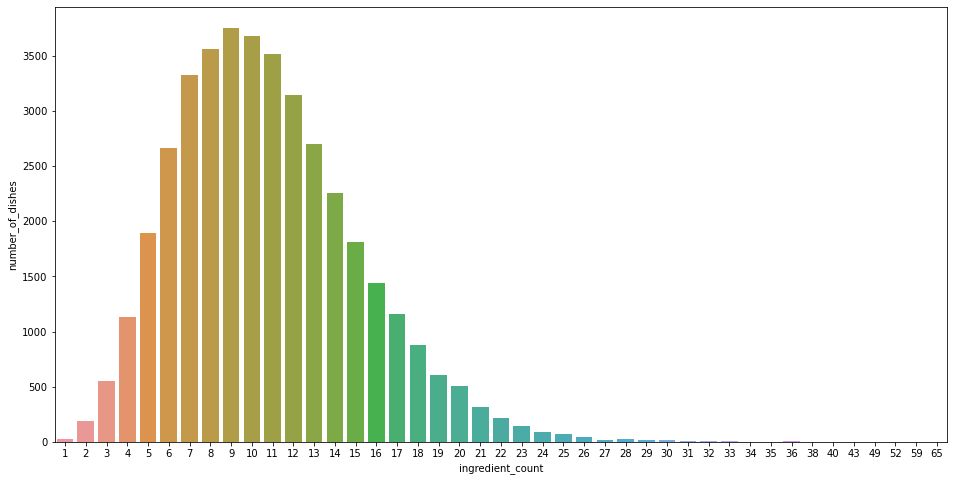

In [88]:
# barplot of no. of meals containing <ingredient_count> types of ingredients

f, ax = plt.subplots(figsize=(16,8))
sb.barplot(x ='ingredient_count', y ='number_of_dishes',
            data = (data_with_ingr_df.ingredients.map(lambda x: len(x))
                    .value_counts()
                    .sort_index()
                    .reset_index()
                    .rename(columns={'index':'ingredient_count', 'ingredients':'number_of_dishes'}))
            )

### Data Cleaning 

In [4]:
data_ingredients=data_df.ingredients
rawlist=[item for sublist in data_ingredients.ravel() for item in sublist] #convert the ingredients list of lists into a list
ingredients=list(set(rawlist)) #remove duplicates13

In [66]:
train_df, test_df = train_test_split(data_df, test_size = 0.25)

In [67]:
for ing in ingredients:
    vector=[]
    # loop for train data
    for recipe in train_df.ingredients: 
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    train_df[ing]=pd.Series(vector,index=train_df.index) # Adds column containing 0 and 1's for this ingredient
    
    # loop for test data
    vector=[]
    for recipe in test_df.ingredients:
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    test_df[ing]=pd.Series(vector,index=test_df.index) # Adds column containing 0 and 1's for this ingredient

# useless columns removal
train_df=train_df.drop('ingredients',1)
train_df=train_df.drop('id',1)

test_df=test_df.drop('ingredients',1)
test_df=test_df.drop('id',1)

train_df.head()

<ipython-input-67-9187aeb17629>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[ing]=pd.Series(vector,index=train_df.index) # Adds column containing 0 and 1's for this ingredient
<ipython-input-67-9187aeb17629>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[ing]=pd.Series(vector,index=test_df.index) # Adds column containing 0 and 1's for this ingredient


,cuisine,vermicelli noodles,unsalted roasted peanuts,light red kidney beans,spaghetti,prego traditional italian sauce,dried bonito flakes,choy sum,almond butter,vermicelli,...,tuna in oil,bone-in short ribs,short rib,lamb cutlet,Philadelphia Cream Cheese,pace picante sauce,ground mustard,frozen mixed vegetables,fresh basil,canola mayonnaise
25602,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10485,french,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4549,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4888,moroccan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2667,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_train=train_df.drop('cuisine',axis=1)
Y_train=train_df['cuisine']
X_test=test_df.drop('cuisine',axis=1)
Y_test=test_df['cuisine']

### Decision Tree

In [73]:
from sklearn import tree

clf = tree.DecisionTreeClassifier().fit(X_train, Y_train)

In [74]:
Y_pred = clf.predict(X_train)
metrics.accuracy_score(Y_train, Y_pred)

0.9997318136104593

In [75]:
Y_pred = clf.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.6072003218020917

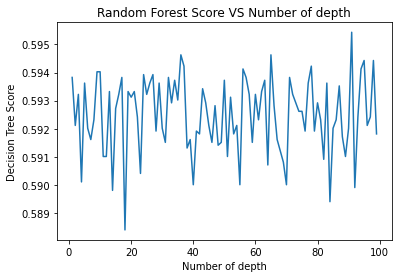

In [72]:
opt_table_depth=list()
n_depth = 100
for i in range(1,n_depth):
    forest=RFC(max_depth = n_depth)
    clf.fit(X_train,Y_train)
    output=clf.predict(X_test)
    opt_table_depth.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_depth), opt_table_depth)
plt.xlabel('Number of depth')
plt.ylabel('Decision Tree Score')
plt.title('Random Forest Score VS Number of depth')
plt.show()

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier as RFC

forest=RFC(n_estimators=10,max_features=10)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
metrics.accuracy_score(Y_train, output)

0.9947008084168182

In [46]:
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

0.6497378061920839

In [65]:
forest=RFC(n_estimators=10,max_features=10, max_depth = 1)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

kf = KFold(n_splits=100)
scores = cross_val_score(forest, X_train, Y_train, cv=5)
print(scores)


0.199203187250996
0.19955462969614252
[0.21059756 0.19667376 0.19764069 0.21237911 0.20251451]


In [48]:
forest=RFC(n_estimators=10,max_features=10, max_depth = 5)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))



0.2365682899470081
0.2376984412039365


In [49]:
forest=RFC(n_estimators=10,max_features=10, max_depth =10)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.29563300197269177
0.2960994181452482


In [61]:
forest=RFC(n_estimators=10,max_features=10, max_depth =70)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.7069585734730979
0.5277638100711156


In [50]:
forest=RFC(n_estimators=10,max_features=10, max_depth =100)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.8148377364329091
0.562675095179944


In [51]:
forest=RFC(n_estimators=10,max_features=10, max_depth =1000)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.9946234479557499
0.6497378061920839


In [52]:
forest=RFC(n_estimators=10,max_features=10, max_depth =1500)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.9949715700305574
0.6401838948351412


In [53]:
forest=RFC(n_estimators=10,max_features=10, max_depth =2000)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.9944687270336131
0.6439192586739458


In [40]:
forest=RFC(n_estimators=10,max_features=10, max_depth =3000)
forest.fit(X_train,Y_train)

output=forest.predict(X_train)
print(metrics.accuracy_score(Y_train, output))
output=forest.predict(X_test)
print(metrics.accuracy_score(Y_test, output))

0.9943345625209521
0.6609010458567981


the train set accuracy grows faster then the test set accuracy, but its overall getting better

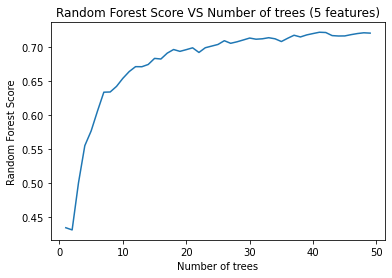

In [9]:
opt_table_estimators=list()
n_features=5
n_estimators=50
for i in range(1,n_estimators):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_estimators), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

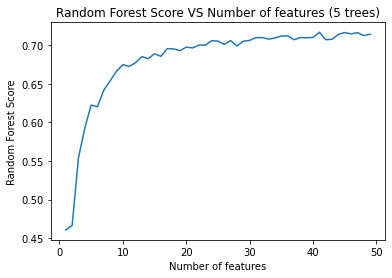

In [10]:
opt_table_n_features=list()
n_estimators=5
n_features=50
for i in range(1,n_features):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_n_features.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_features), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show() 

In [49]:
forest=RFC(n_estimators=40,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

0.7162107803700724

In [11]:
forest=RFC(n_estimators=40,max_features=40)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

0.7108809332260659

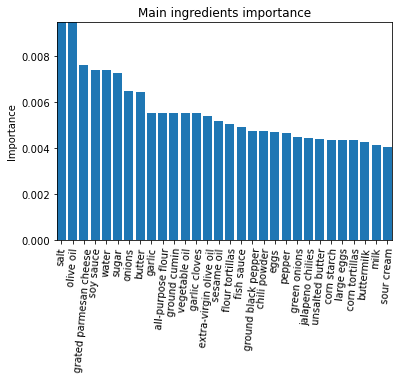

In [183]:
importance = forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.004,:]
x = np.arange(len(importance_plot.index.values))
#print(importance_plot.index)
y = importance_plot["Importance"]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

### MLP Classifier

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
clf1 = MLPClassifier(hidden_layer_sizes=(3000, 1500), random_state=1, early_stopping = True, verbose=True)

In [79]:
clf1.fit(X_train, Y_train)

Iteration 1, loss = 1.07429183
Validation score: 0.776064
Iteration 2, loss = 0.41000613
Validation score: 0.774388
Iteration 3, loss = 0.16029640
Validation score: 0.782769
Iteration 4, loss = 0.06521383
Validation score: 0.782769
Iteration 5, loss = 0.02670979
Validation score: 0.776064
Iteration 6, loss = 0.01591693
Validation score: 0.777741
Iteration 7, loss = 0.01131252
Validation score: 0.779752
Iteration 8, loss = 0.00780163
Validation score: 0.780758
Iteration 9, loss = 0.00642761
Validation score: 0.780422
Iteration 10, loss = 0.00570629
Validation score: 0.786121
Iteration 11, loss = 0.00572763
Validation score: 0.781763
Iteration 12, loss = 0.00647086
Validation score: 0.774388
Iteration 13, loss = 0.00640640
Validation score: 0.775729
Iteration 14, loss = 0.02581021
Validation score: 0.766678
Iteration 15, loss = 0.07024105
Validation score: 0.765337
Iteration 16, loss = 0.07775785
Validation score: 0.754274
Iteration 17, loss = 0.04225655
Validation score: 0.760979
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(3000, 1500),
              random_state=1, verbose=True)

In [80]:
output1=clf1.predict(X_train)
metrics.accuracy_score(Y_train, output1)

0.9783104257458934

In [186]:
output1=clf1.predict(X_test)
metrics.accuracy_score(Y_test, output1)

0.7723250201126307

In [81]:
clf2 = MLPClassifier(hidden_layer_sizes=(3000, 1500, 750), random_state=1, early_stopping = True, verbose=True)

In [82]:
clf2.fit(X_train, Y_train)

Iteration 1, loss = 1.13013328
Validation score: 0.758632
Iteration 2, loss = 0.44800318
Validation score: 0.752263
Iteration 3, loss = 0.16221577
Validation score: 0.766678
Iteration 4, loss = 0.05771533
Validation score: 0.771036
Iteration 5, loss = 0.02626650
Validation score: 0.772377
Iteration 6, loss = 0.02049897
Validation score: 0.760308
Iteration 7, loss = 0.01651001
Validation score: 0.766343
Iteration 8, loss = 0.01515125
Validation score: 0.766343
Iteration 9, loss = 0.02255161
Validation score: 0.758297
Iteration 10, loss = 0.04594176
Validation score: 0.754609
Iteration 11, loss = 0.03867714
Validation score: 0.755615
Iteration 12, loss = 0.03439799
Validation score: 0.752263
Iteration 13, loss = 0.02579161
Validation score: 0.756286
Iteration 14, loss = 0.01911196
Validation score: 0.750251
Iteration 15, loss = 0.00894344
Validation score: 0.759638
Iteration 16, loss = 0.00859228
Validation score: 0.764331
Validation score did not improve more than tol=0.000100 for 10 co

MLPClassifier(early_stopping=True, hidden_layer_sizes=(3000, 1500, 750),
              random_state=1, verbose=True)

In [83]:
output2=clf2.predict(X_train)
metrics.accuracy_score(Y_train, output2)

0.9735501173315454

In [190]:
output2=clf2.predict(X_test)
metrics.accuracy_score(Y_test, output2)

0.7699115044247787

### KNN(k-nearest neighbors)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = neigh.predict(X_train)
metrics.accuracy_score(Y_train, Y_pred)

In [10]:
Y_pred = neigh.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.5088495575221239